In [1]:
# This notebook illustrates how to use the libraries and functions in the
# sparc_public repository to run SPARC encoding + AMP decoding simulations
# and state evolution simulations.
#
# Copyright (c) 2021 Kuan Hsieh

import numpy as np 
from sparc_sim import sparc_sim
from sparc_se import sparc_se
import matplotlib.pyplot as plt
import time

# Regular SPARCs

In [2]:
# SPARC with AMP decoding simulations

awgn_var      = 1.0            # AWGN channel noise variance
code_params   = {'P': 15.0,    # Average codeword symbol power constraint
                 'R': 1.3,     # Rate
                 'L': 1000,    # Number of sections
                 'M': 32}      # Columns per section
decode_params = {'t_max': 25}  # Maximum number of iterations
num_of_runs   = 10             # Number of encoding/decoding trials
rng = np.random.RandomState(seed=None) # Random number generator

nmse_store  = np.zeros((num_of_runs, decode_params['t_max']))
for i in range(num_of_runs):
    start_time    = time.perf_counter()
    rng_seed      = rng.randint(2**32-1, size=2).tolist()
    results       = sparc_sim(code_params, decode_params, awgn_var, rng_seed) 
    nmse_store[i] = results['nmse']
    print('Run #{}, SER: {:1.4f}, number of iterations: {:3d}, time elapsed: {:2.3f}'
          .format(i, results['ser'], results['t_final'], time.perf_counter()-start_time))
print('Code parameters:', code_params)

Run #0, SER: 0.0000, number of iterations:  17, time elapsed: 0.117
Run #1, SER: 0.0000, number of iterations:  10, time elapsed: 0.049
Run #2, SER: 0.0000, number of iterations:  12, time elapsed: 0.061
Run #3, SER: 0.0000, number of iterations:  12, time elapsed: 0.055
Run #4, SER: 0.0000, number of iterations:  11, time elapsed: 0.058
Run #5, SER: 0.0000, number of iterations:  12, time elapsed: 0.068
Run #6, SER: 0.0000, number of iterations:  10, time elapsed: 0.051
Run #7, SER: 0.0000, number of iterations:  11, time elapsed: 0.055
Run #8, SER: 0.0000, number of iterations:  11, time elapsed: 0.058
Run #9, SER: 0.0000, number of iterations:  13, time elapsed: 0.058
Code parameters: {'complex': False, 'modulated': False, 'power_allocated': False, 'spatially_coupled': False, 'P': 15.0, 'R': 1.3, 'L': 1000, 'M': 32, 'n': 3846, 'R_actual': 1.3000520020800832}


In [3]:
# State evolution
mc_samples = 1000000
nmse_se,_ = sparc_se(awgn_var, code_params, decode_params['t_max'], mc_samples)

Text(0, 0.5, 'NMSE')

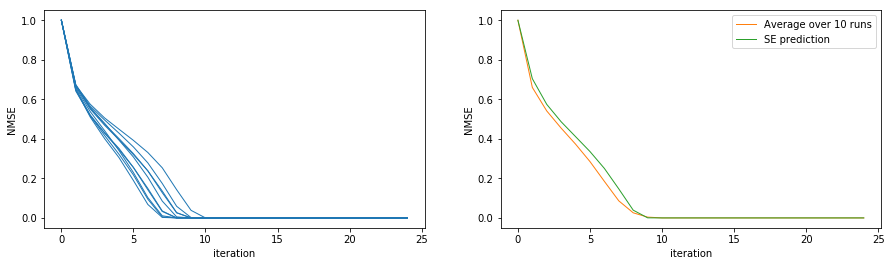

In [4]:
plt.figure(figsize=(15,4))
plt.subplot(121)
_=plt.plot(nmse_store.T, linewidth=1.0, color='C0')
plt.xlabel('iteration')
plt.ylabel('NMSE')
plt.subplot(122)
_=plt.plot(nmse_store.mean(axis=0), linewidth=1.0, color='C1')
_=plt.plot(nmse_se, linewidth=1.0, color='C2')
plt.legend(['Average over {} runs'.format(num_of_runs), 'SE prediction'])
plt.xlabel('iteration')
plt.ylabel('NMSE')

# Power allocated SPARCs

In [5]:
# SPARC with AMP decoding simulations
awgn_var      = 1.0                 # AWGN channel noise variance
code_params   = {'power_allocated': True,
                 'P': 15.0,         # Average codeword symbol power constraint
                 'R': 1.4,          # Rate
                 'L': 1024,         # Number of sections
                 'M': 32,           # Columns per section
                 'B': 32,           # Number of different 'powers'
                 'R_PA_ratio': 0.9} # Parameter for iterative power allocation
decode_params = {'t_max': 25}       # Maximum number of iterations
num_of_runs   = 10                  # Number of encoding/decoding trials
rng = np.random.RandomState(seed=None) 

nmse_store  = np.zeros((num_of_runs, decode_params['t_max']))
for i in range(num_of_runs):
    start_time    = time.perf_counter()
    rng_seed      = rng.randint(2**32-1, size=2).tolist()
    results       = sparc_sim(code_params, decode_params, awgn_var, rng_seed) 
    nmse_store[i] = results['nmse'].mean(axis=1)
    print('Run #{}, SER: {:1.4f}, number of iterations: {:3d}, time elapsed: {:2.3f}'
          .format(i, results['ser'], results['t_final'], time.perf_counter()-start_time))
print('Code parameters:', code_params)

Run #0, SER: 0.0000, number of iterations:  15, time elapsed: 0.151
Run #1, SER: 0.0000, number of iterations:  17, time elapsed: 0.144
Run #2, SER: 0.0000, number of iterations:  15, time elapsed: 0.136
Run #3, SER: 0.0000, number of iterations:  16, time elapsed: 0.131
Run #4, SER: 0.0000, number of iterations:  20, time elapsed: 0.166
Run #5, SER: 0.0000, number of iterations:  19, time elapsed: 0.151
Run #6, SER: 0.0000, number of iterations:  16, time elapsed: 0.156
Run #7, SER: 0.0000, number of iterations:  19, time elapsed: 0.216
Run #8, SER: 0.0000, number of iterations:  20, time elapsed: 0.268
Run #9, SER: 0.0000, number of iterations:  16, time elapsed: 0.187
Code parameters: {'complex': False, 'modulated': False, 'power_allocated': True, 'spatially_coupled': False, 'P': 15.0, 'R': 1.4, 'L': 1024, 'M': 32, 'B': 32, 'R_PA_ratio': 0.9, 'n': 3657, 'R_actual': 1.400054689636314}


In [6]:
# State evolution
mc_samples = 100000
nmse_se,_ = sparc_se(awgn_var, code_params, decode_params['t_max'], mc_samples)

Text(0, 0.5, 'NMSE')

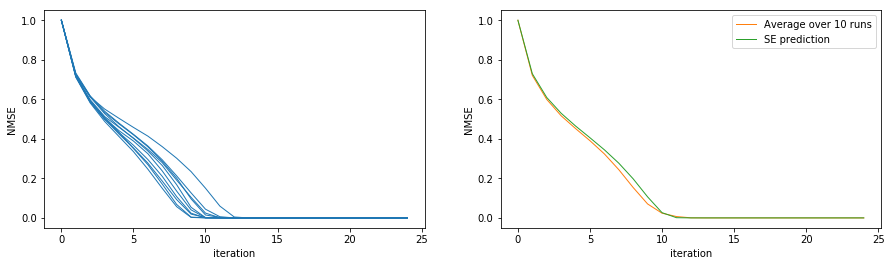

In [7]:
plt.figure(figsize=(15,4))
plt.subplot(121)
_=plt.plot(nmse_store.T, linewidth=1.0, color='C0')
plt.xlabel('iteration')
plt.ylabel('NMSE')
plt.subplot(122)
_=plt.plot(nmse_store.mean(axis=0), linewidth=1.0, color='C1')
_=plt.plot(nmse_se.mean(axis=1), linewidth=1.0, color='C2')
plt.legend(['Average over {} runs'.format(num_of_runs), 'SE prediction'])
plt.xlabel('iteration')
plt.ylabel('NMSE')

# Spatially coupled SPARCs

In [8]:
# SPARC with AMP decoding simulations

awgn_var      = 1.0                 # AWGN channel noise variance
code_params   = {'spatially_coupled': True,
                 'P': 15.0,         # Average codeword symbol power constraint
                 'R': 1.4,          # Rate
                 'L': 1024,         # Number of sections
                 'M': 32,           # Columns per section
                 'omega': 2,        # Coupling width
                 'Lambda': 8}       # Coupling length
decode_params = {'t_max': 25}       # Maximum number of iterations
num_of_runs   = 10                  # Number of encoding/decoding trials
rng = np.random.RandomState(seed=None) 

nmse_store  = np.zeros((num_of_runs, decode_params['t_max']))
for i in range(num_of_runs):
    start_time    = time.perf_counter()
    rng_seed      = rng.randint(2**32-1, size=2).tolist()
    results       = sparc_sim(code_params, decode_params, awgn_var, rng_seed) 
    nmse_store[i] = results['nmse'].mean(axis=1)
    print('Run #{}, SER: {:1.4f}, number of iterations: {:3d}, time elapsed: {:2.3f}'
          .format(i, results['ser'], results['t_final'], time.perf_counter()-start_time))
print('Code parameters:', code_params)

Run #0, SER: 0.0000, number of iterations:  18, time elapsed: 0.197
Run #1, SER: 0.0000, number of iterations:  20, time elapsed: 0.157
Run #2, SER: 0.0000, number of iterations:  19, time elapsed: 0.153
Run #3, SER: 0.0000, number of iterations:  18, time elapsed: 0.157
Run #4, SER: 0.0000, number of iterations:  20, time elapsed: 0.164
Run #5, SER: 0.0000, number of iterations:  21, time elapsed: 0.153
Run #6, SER: 0.0000, number of iterations:  19, time elapsed: 0.271
Run #7, SER: 0.0000, number of iterations:  23, time elapsed: 0.358
Run #8, SER: 0.0000, number of iterations:  20, time elapsed: 0.160
Run #9, SER: 0.0000, number of iterations:  24, time elapsed: 0.180
Code parameters: {'complex': False, 'modulated': False, 'power_allocated': False, 'spatially_coupled': True, 'P': 15.0, 'R': 1.4, 'L': 1024, 'M': 32, 'omega': 2, 'Lambda': 8, 'n': 3654, 'R_actual': 1.4012041598248495}


In [9]:
# State evolution
mc_samples = 100000
nmse_se,_ = sparc_se(awgn_var, code_params, decode_params['t_max'], mc_samples)

Text(0, 0.5, 'NMSE')

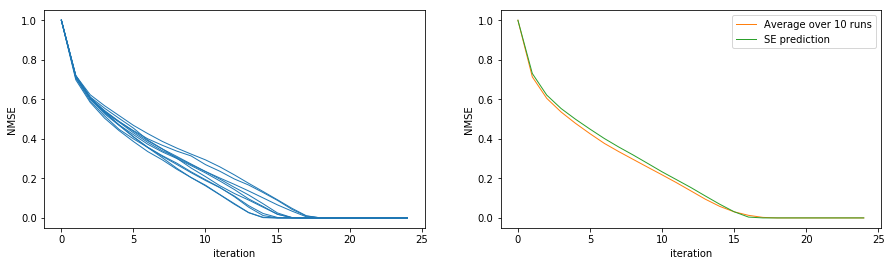

In [10]:
plt.figure(figsize=(15,4))
plt.subplot(121)
_=plt.plot(nmse_store.T, linewidth=1.0, color='C0')
plt.xlabel('iteration')
plt.ylabel('NMSE')
plt.subplot(122)
_=plt.plot(nmse_store.mean(axis=0), linewidth=1.0, color='C1')
_=plt.plot(nmse_se.mean(axis=1), linewidth=1.0, color='C2')
plt.legend(['Average over {} runs'.format(num_of_runs), 'SE prediction'])
plt.xlabel('iteration')
plt.ylabel('NMSE')

# Modulated complex SPARCs

In [12]:
# SPARC with AMP decoding simulations

awgn_var      = 1.0                 # AWGN channel noise variance
code_params   = {'complex':   True,
                 'modulated': True,
                 'P': 15.0,         # Average codeword symbol power constraint
                 'R': 1.3*2,        # Rate
                 'L': 1024*2,       # Number of sections
                 'M': 8,            # Columns per section
                 'K': 4}            # Modulation factor
decode_params = {'t_max': 25}       # Maximum number of iterations
num_of_runs   = 10                  # Number of encoding/decoding trials
rng = np.random.RandomState(seed=None)

nmse_store  = np.zeros((num_of_runs, decode_params['t_max']))
for i in range(num_of_runs):
    start_time    = time.perf_counter()
    rng_seed      = rng.randint(2**32-1, size=2).tolist()
    results       = sparc_sim(code_params, decode_params, awgn_var, rng_seed) 
    nmse_store[i] = results['nmse']
    print('Run #{}, SER: {:1.4f}, number of iterations: {:3d}, time elapsed: {:2.3f}'
          .format(i, results['ser'], results['t_final'], time.perf_counter()-start_time))
print('Code parameters:', code_params)

Run #0, SER: 0.0000, number of iterations:  11, time elapsed: 0.209
Run #1, SER: 0.0000, number of iterations:  12, time elapsed: 0.191
Run #2, SER: 0.0000, number of iterations:  11, time elapsed: 0.205
Run #3, SER: 0.0000, number of iterations:  11, time elapsed: 0.185
Run #4, SER: 0.0000, number of iterations:  12, time elapsed: 0.257
Run #5, SER: 0.0000, number of iterations:  12, time elapsed: 0.307
Run #6, SER: 0.0000, number of iterations:  11, time elapsed: 0.253
Run #7, SER: 0.0000, number of iterations:  11, time elapsed: 0.196
Run #8, SER: 0.0000, number of iterations:  12, time elapsed: 0.270
Run #9, SER: 0.0000, number of iterations:  12, time elapsed: 0.319
Code parameters: {'complex': True, 'modulated': True, 'power_allocated': False, 'spatially_coupled': False, 'P': 15.0, 'R': 2.6, 'L': 2048, 'M': 8, 'K': 4, 'n': 3938, 'R_actual': 2.600304723209751}


In [13]:
# State evolution
mc_samples = 1000000
nmse_se,_ = sparc_se(awgn_var, code_params, decode_params['t_max'], mc_samples)

Text(0, 0.5, 'NMSE')

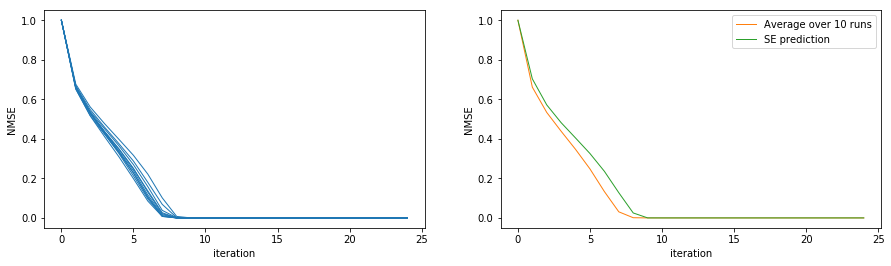

In [14]:
plt.figure(figsize=(15,4))
plt.subplot(121)
_=plt.plot(nmse_store.T, linewidth=1.0, color='C0')
plt.xlabel('iteration')
plt.ylabel('NMSE')
plt.subplot(122)
_=plt.plot(nmse_store.mean(axis=0), linewidth=1.0, color='C1')
_=plt.plot(nmse_se, linewidth=1.0, color='C2')
plt.legend(['Average over {} runs'.format(num_of_runs), 'SE prediction'])
plt.xlabel('iteration')
plt.ylabel('NMSE')